# PREGLED NBA LIGE MED LETOM 1999-2020

In [20]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import plotly.express as px




In [21]:
df_all = pd.read_csv("players_stats_by_season_full_details.csv") 
print(df_all.shape)

(53949, 34)


In [22]:
df_all.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school', 'draft_round', 'draft_pick', 'draft_team'],
      dtype='object')

In [23]:
df_all["League"].unique()

array(['NBA', 'Euroleague', 'Eurocup', 'Australian-NBL', 'German-BBL',
       'Italian-Lega-Basket-Serie-A', 'Spanish-ACB', 'French-Jeep-Elite',
       'Argentinian-Liga-A', 'Austrian-A-Bundesliga', 'Balkan-BIL',
       'Belarusian-BPL', 'Belgium-Scooore-League', 'Bosnian-BiH-Liga',
       'Brazilian-NBB', 'British-BBL', 'Bulgarian-NBL', 'Canadian-NBL',
       'Chinese-CBA', 'Croatian-A-1-Liga', 'Czech-NBL',
       'Danish-Basketligaen', 'Finnish-Korisliiga', 'Greek-HEBA-A1',
       'Hungarian-NBIA', 'Israeli-BSL', 'Lithuanian-LKL',
       'Macedonian-Superleague', 'Mexican-LNBP', 'Netherlands-DBL',
       'New-Zealand-NBL', 'Norwegian-BLNO', 'Polish-TBL',
       'Romanian-Divizia-A', 'Serbian-KLS', 'Slovakian-Extraliga',
       'Slovenian-SKL', 'South-Korean-KBL', 'Swedish-Basketligan',
       'Swiss-LNA', 'Turkish-BSL', 'Ukrainian-Superleague',
       'Georgian-Super-Liga', 'Lebanese-Division-A',
       'Luxembourg-Total-League', 'FIBA-Europe-Cup', 'Japanese-BLeague',
       'Kosovo-

In [24]:
cols_dict = {
    "GP": "Games_Played", # odigrane tekme
    "MIN": "Minutes_Played", # igralni čas v minutah
    "FGM": "Field_Goals_Made", # uspešni meti iz igre ( 2 točke ali 2+1 točka)
    "FGA": "Field_Goals_Attempts", # vsi poizkušani meti iz igre ( 2 točke ali 2+1 točka)
    "3PM": "Three_Points_Made", # uspešni poizkusi meta iz črte za 3.točke
    "3PA": "Three_Points_Attempts", # vsi poizkusi meta iz črte za 3.točke
    "FTM": "Free_Throws_Made", # število doseženih točk iz črte za proste mete
    "FTA": "Free_Throws_Attempts", # število možnih doseženih točk iz črte za proste mete
    "TOV": "Turnovers", # izgubljene žoge
    "PF": "Personal_Fouls", # narejene napake
    "ORB": "Offensive_Rebounds", #skoki v napadu
    "DRB": "Defensive_Rebounds", #skoki v obrambi
    "REB": "Rebounds", #skoki
    "AST": "Assists", # asistence
    "STL": "Steals", # odvzete žoge
    "BLK": "Blocks", # blokade
    "PTS": "Points"  # dosežene točke
}

dff_all = df_all.rename(columns = cols_dict)

In [52]:
nba_all = dff_all[dff_all["League"]=="NBA"] # samo nba liga 
print("---------------------------------")
print("NBA dataset vsebuje",len(nba_reg_season["Player"].unique()),"igralcev lige NBA in",nba_all.shape[1],"kategorij")
print("---------------------------------")
nba_all.drop(columns=["weight","height","birth_date"]) # dropal columne

# ustvarjanje novega stolpca za leto sezone
end_season_year = []
start_season_year = []
season = nba_all["Season"]


for x in season:
    end_season_year.append(int(x.split()[2]))

for y in end_season_year:
    start_season_year.append(y -1 )



---------------------------------
NBA dataset vsebuje 1074 igralcev lige NBA in 34 kategorij
---------------------------------


In [26]:
nba_all["#Season_year"] = start_season_year # ustvarjanje novega stolpca
nba_all = nba_all.drop(columns=["Season","height","weight"])
nba_all["#Age"] = nba_all["#Season_year"] - nba_all["birth_year"] # ustvarjanje nove vrstice starost v letih
#nba_all["#Two_Points_Made"] = (nba_all["Three_Points_Made"]*3 + nba_all["Free_Throws_Made"]) - nba_all["Points"]
#nba_all["#Two_Points_Made"] = abs(nba_all["#Two_Points_Made"]/2) # ustvarjanje novega stolpca zadeti meti iz igre

<ipython-input-26-f1ca7b29121a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_all["#Season_year"] = start_season_year # ustvarjanje novega stolpca


In [27]:
#DELJENJE DATAFRAMA NA REGULAR SEASON, PLAYOFFS

nba_reg_season = nba_all[nba_all["Stage"]=="Regular_Season"]
nba_playoffs = nba_all[nba_all["Stage"]=="Playoffs"]
print("done")

done


In [37]:
nba_reg_season.isnull().sum()

League                     0
Stage                      0
Player                     0
Team                       0
Games_Played               0
Minutes_Played             0
Field_Goals_Made           0
Field_Goals_Attempts       0
Three_Points_Made          0
Three_Points_Attempts      0
Free_Throws_Made           0
Free_Throws_Attempts       0
Turnovers                  0
Personal_Fouls             0
Offensive_Rebounds         0
Defensive_Rebounds         0
Rebounds                   0
Assists                    0
Steals                     0
Blocks                     0
Points                     0
birth_year                 0
birth_month                0
birth_date                 0
height_cm                  0
weight_kg                  0
nationality                0
high_school              507
draft_round              465
draft_pick               465
draft_team               465
#Season_year               0
#Age                       0
dtype: int64

In [38]:
dropcols = ["high_school","draft_round","draft_pick","draft_team"]
nba_reg_season = nba_reg_season.drop(columns = dropcols)

In [39]:
nba_reg_season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4658 entries, 0 to 51975
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   League                 4658 non-null   object 
 1   Stage                  4658 non-null   object 
 2   Player                 4658 non-null   object 
 3   Team                   4658 non-null   object 
 4   Games_Played           4658 non-null   int64  
 5   Minutes_Played         4658 non-null   float64
 6   Field_Goals_Made       4658 non-null   int64  
 7   Field_Goals_Attempts   4658 non-null   int64  
 8   Three_Points_Made      4658 non-null   int64  
 9   Three_Points_Attempts  4658 non-null   int64  
 10  Free_Throws_Made       4658 non-null   int64  
 11  Free_Throws_Attempts   4658 non-null   int64  
 12  Turnovers              4658 non-null   int64  
 13  Personal_Fouls         4658 non-null   int64  
 14  Offensive_Rebounds     4658 non-null   int64  
 15  Def

In [51]:
len(nba_reg_season["Player"].unique())

1074

In [42]:
for column in nba_reg_season:
    unique_vals = np.unique(nba_reg_season[column])
    numb_values = len(unique_vals)
    if numb_values < 10:
        print("število unikatnih vrednosti za {} je {}  {}".format(column, numb_values, unique_vals))
    else:
        print("število vrednosti za {} je {}".format(column,numb_values))

število unikatnih vrednosti za League je 1  ['NBA']
število unikatnih vrednosti za Stage je 1  ['Regular_Season']
število vrednosti za Player je 1074
število vrednosti za Team je 33
število vrednosti za Games_Played je 64
število vrednosti za Minutes_Played je 4029
število vrednosti za Field_Goals_Made je 722
število vrednosti za Field_Goals_Attempts je 1318
število vrednosti za Three_Points_Made je 253
število vrednosti za Three_Points_Attempts je 574
število vrednosti za Free_Throws_Made je 535
število vrednosti za Free_Throws_Attempts je 642
število vrednosti za Turnovers je 312
število vrednosti za Personal_Fouls je 280
število vrednosti za Offensive_Rebounds je 321
število vrednosti za Defensive_Rebounds je 643
število vrednosti za Rebounds je 832
število vrednosti za Assists je 635
število vrednosti za Steals je 187
število vrednosti za Blocks je 219
število vrednosti za Points je 1599
število vrednosti za birth_year je 40
število vrednosti za birth_month je 12
število vrednosti 

In [10]:
nba_reg_season.columns

Index(['League', 'Stage', 'Player', 'Team', 'Games_Played', 'Minutes_Played',
       'Field_Goals_Made', 'Field_Goals_Attempts', 'Three_Points_Made',
       'Three_Points_Attempts', 'Free_Throws_Made', 'Free_Throws_Attempts',
       'Turnovers', 'Personal_Fouls', 'Offensive_Rebounds',
       'Defensive_Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Points', 'birth_year', 'birth_month', 'birth_date', 'height_cm',
       'weight_kg', 'nationality', 'high_school', 'draft_round', 'draft_pick',
       'draft_team', '#Season_year', '#Age'],
      dtype='object')

PREGLED NBA PODATKOV MED LETOM 1999-2020 ZA REDNO SEZONO

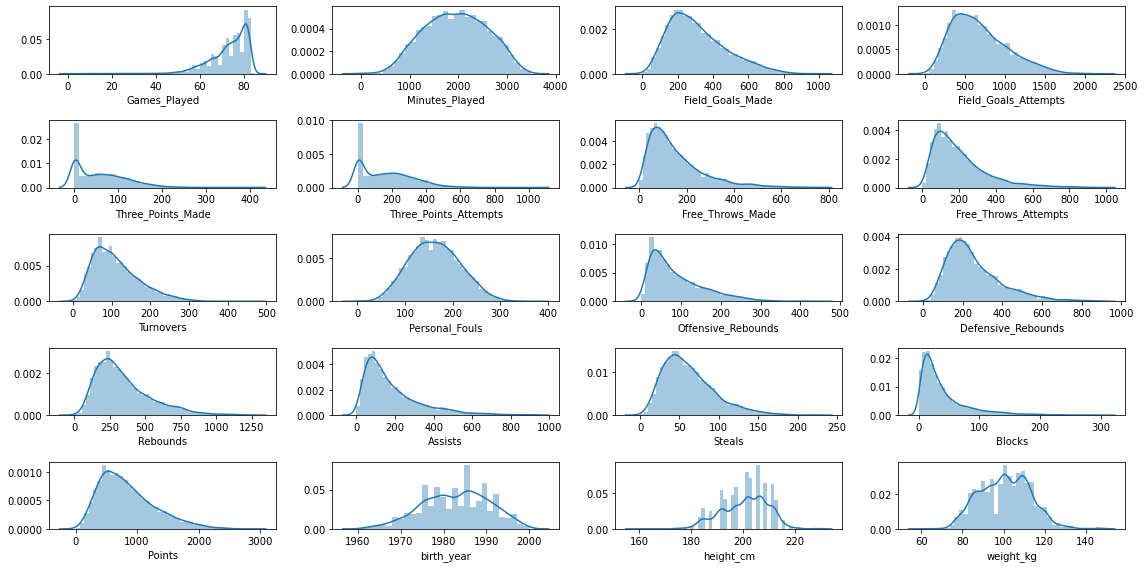

In [15]:
usecols = ['Games_Played', 'Minutes_Played',
       'Field_Goals_Made', 'Field_Goals_Attempts', 'Three_Points_Made',
       'Three_Points_Attempts', 'Free_Throws_Made', 'Free_Throws_Attempts',
       'Turnovers', 'Personal_Fouls', 'Offensive_Rebounds',
       'Defensive_Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks',
       'Points', 'birth_year', 'height_cm',
       'weight_kg', 'draft_round', 'draft_pick',
       '#Season_year', '#Age']

test = nba_reg_season[usecols]

rows = 5
cols = 4


fig,ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16,8))

col = test.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(test[col[index]],ax=ax[i][j])
        index = index + 1
        
        
plt.tight_layout()



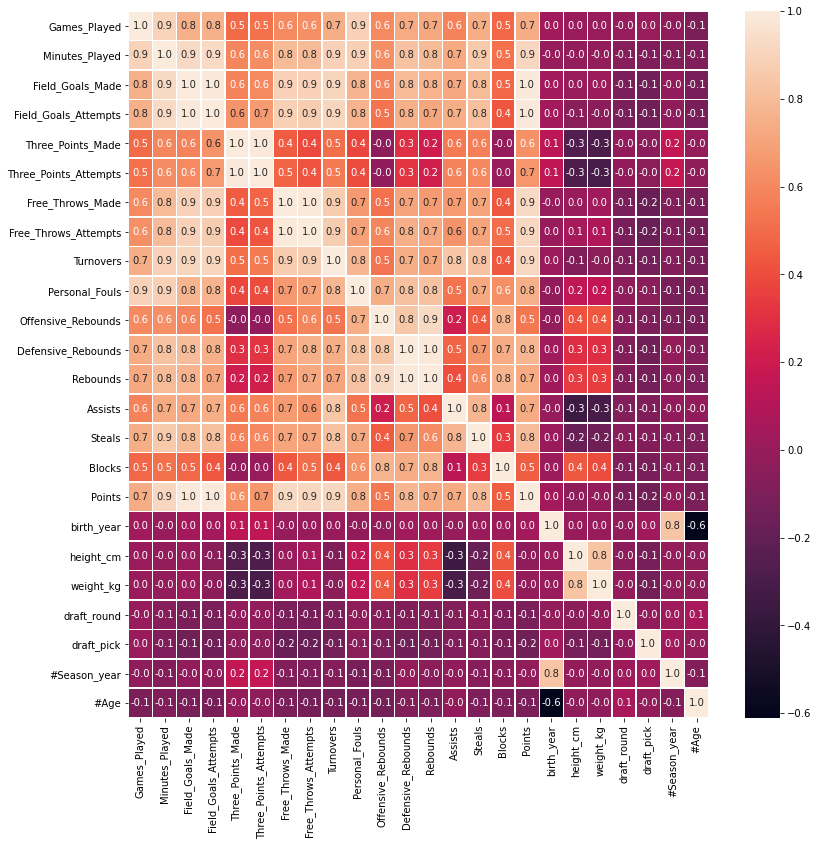

In [16]:
#KORELACIJA

f,ax = plt.subplots(figsize=(13, 13))
sns.heatmap(nba_all.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

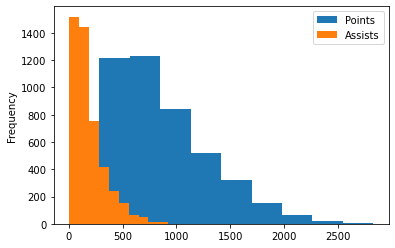

In [17]:
nba_reg_season["Points"].plot.hist()
nba_reg_season["Assists"].plot.hist()
plt.legend()
plt.show()

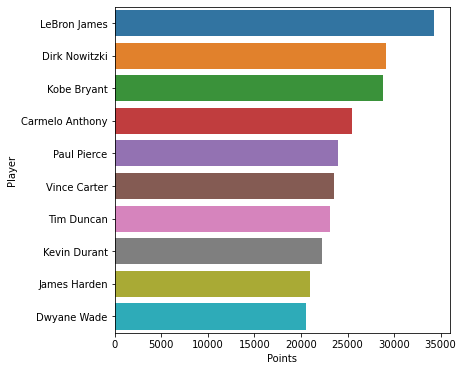

In [18]:
# Igralci s skupno največ doseženimi točkami med letom (1999-2020) za redni del igranja
point_leaders = nba_reg_season.groupby("Player").sum().sort_values(by="Points", ascending = False).head(10)
point_leaders = point_leaders.reset_index()
plt.figure(figsize=(6,6))
sns.barplot(x="Points",y= "Player",data = point_leaders)
plt.show()

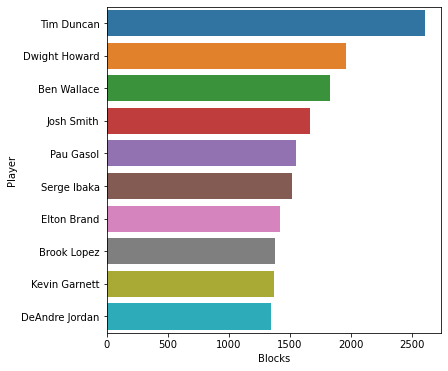

In [19]:
#Igralec z največjim številom blokad v igralnem letu 2019-2020
block_leader_2020 = nba_reg_season.groupby("Player").sum().sort_values(by="Blocks", ascending = False).head(10)
block_leader_2020 = block_leader_2020.reset_index()
plt.figure(figsize=(6,6))
sns.barplot(x="Blocks",y="Player",data = block_leader_2020)
plt.show()



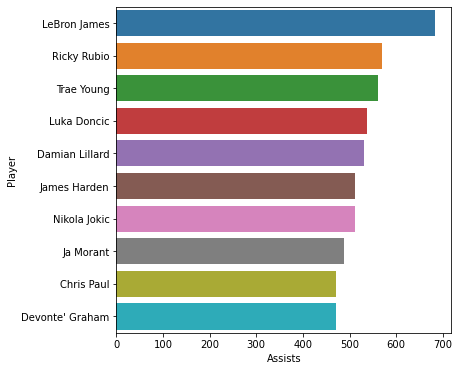

In [71]:

#USTVARJANJE FUNKCIJE ZA HITER PREGLED
# primer najboljših 10 igralcev z največ asistencami v rednem delu za sezono 2019-2020

def findplayer(year,b):
    
    x = nba_reg_season[nba_reg_season["#Season_year"]==year].groupby("Player").sum().sort_values(by=b, ascending = False).head(10)
    x = x.reset_index()
    plt.figure(figsize=(6,6))
    sns.barplot(x=b, y= "Player",data = x)
    plt.show()
    
findplayer(2019,"Assists")

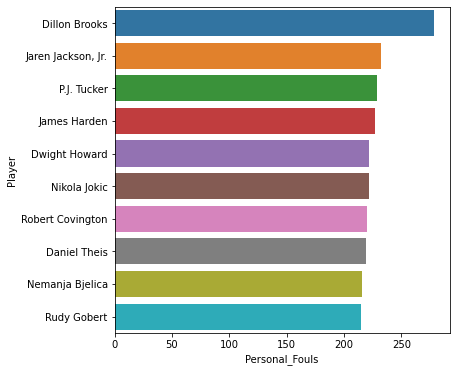

In [73]:
# Igralci z največ največ doseženimi prekrški v igralni sezoni 2019-2020
findplayer(2019,"Personal_Fouls")

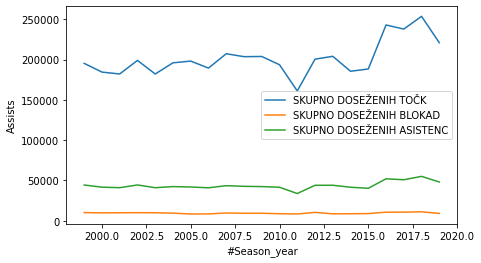

In [74]:
# Skupaj točk na sezono
plt.figure(figsize = (7,4))
total_points = nba_all.groupby("#Season_year").sum().sort_values(by="Points",ascending=False)
total_points = total_points.reset_index()

total_points = total_points[["#Season_year","Points"]]
plot= sns.lineplot(data=total_points, x="#Season_year",y = "Points")#

#### skupaj blokad

total_blocks = nba_all.groupby("#Season_year").sum().sort_values(by="Blocks",ascending=False)
total_blocks = total_blocks.reset_index()

total_blocks = total_blocks[["#Season_year","Blocks"]]
plot1= sns.lineplot(data=total_blocks, x="#Season_year",y = "Blocks")#

#### skupaj asistenc

total_assist = nba_all.groupby("#Season_year").sum().sort_values(by="Assists",ascending=False)
total_assist = total_assist.reset_index()

total_assist = total_assist[["#Season_year","Assists"]]
plot1= sns.lineplot(data=total_assist, x="#Season_year",y = "Assists",legend = False)#


plt.legend(labels = ["SKUPNO DOSEŽENIH TOČK","SKUPNO DOSEŽENIH BLOKAD","SKUPNO DOSEŽENIH ASISTENC"],loc="best")
plt.show()

In [75]:
total_points[0:5] # največ doseženih skupnih točk (redna sezona + končnica)

,#Season_year,Points
0,2018,253551
1,2016,242838
2,2017,237757
3,2019,220823
4,2007,207171


In [76]:
total_points.tail(5) # najmanj doseženih skupnih točk (redna sezona + končnica)

,#Season_year,Points
16,2014,185465
17,2000,184412
18,2001,182075
19,2003,182057
20,2011,161018


2.1 RAČUNANJE POVPREČJA ZA REDNO SEZONO, LETA 2000, 2010, 2020

In [77]:
def nba_mean_per_year(year):
    x = nba_reg_season[nba_reg_season["#Season_year"]==year]
    print("povprečje odigranih tekem za leto",year,"->", x.Games_Played.mean())
    print("povprečje odigranih minut za leto",year,"->",x.Minutes_Played.mean())
    print("povprečje doseženih asistenc za letu",year,"->",x.Assists.mean())
    print("povprečje doseženih skokov za letu",year,"->",x.Rebounds.mean())
    print("povprečje doseženih točk v letu",year,"->",x.Points.mean())

In [78]:
nba_mean_per_year(2000)
print()
nba_mean_per_year(2019)

povprečje odigranih tekem za leto 2000 -> 76.97905759162303
povprečje odigranih minut za leto 2000 -> 2162.753926701571
povprečje doseženih asistenc za letu 2000 -> 203.90052356020942
povprečje doseženih skokov za letu 2000 -> 385.3350785340314
povprečje doseženih točk v letu 2000 -> 898.2041884816754

povprečje odigranih tekem za leto 2019 -> 60.378571428571426
povprečje odigranih minut za leto 2019 -> 1528.9574999999993
povprečje doseženih asistenc za letu 2019 -> 158.60714285714286
povprečje doseženih skokov za letu 2019 -> 280.9321428571429
povprečje doseženih točk v letu 2019 -> 725.6035714285714


In [79]:
# pregled oziroma korelacija na dejavnike, ki najbolj vplivajo pri dosego točk (spodnji primer)

def corr_meaning(value):
    
    x = nba_all.corr()[value].sort_values (ascending=False)[1:11]
    x.index
    x.values

    point_corr = list(zip(x.index,x.values))
    point_corr = pd.DataFrame(point_corr,columns = ["Korelacija","Vrednost"])
    return point_corr


In [80]:
corr_meaning("Points")

,Korelacija,Vrednost
0,Field_Goals_Made,0.992811
1,Field_Goals_Attempts,0.989568
2,Free_Throws_Made,0.922529
3,Minutes_Played,0.915156
4,Free_Throws_Attempts,0.913711
5,Turnovers,0.912050
6,Steals,0.801686
7,Defensive_Rebounds,0.775885
8,Personal_Fouls,0.754046
9,Games_Played,0.740577


In [81]:
corr_meaning("Games_Played")

,Korelacija,Vrednost
0,Minutes_Played,0.893222
1,Personal_Fouls,0.889718
2,Field_Goals_Attempts,0.760434
3,Field_Goals_Made,0.754048
4,Steals,0.747591
5,Turnovers,0.742707
6,Points,0.740577
7,Defensive_Rebounds,0.735046
8,Rebounds,0.720980
9,Free_Throws_Attempts,0.623586


# MACHINE LEARNING , CLUSTERING ZA SEZONO 2019-2020

In [82]:
#import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

#
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import normalize, scale
from scipy.spatial.distance import pdist, squareform 
import warnings
warnings.simplefilter('ignore')

In [83]:
df_2020 = nba_reg_season[nba_reg_season["#Season_year"]==2019]

In [84]:
cols_to_drop = ["high_school","draft_round","draft_pick","draft_team",
                "League","Stage","nationality","high_school",
               "Team","birth_year","birth_month","birth_date","#Season_year"]   



In [85]:
ml_df_2020 = df_2020.drop(cols_to_drop,axis = 1)


In [86]:
ml_df_2020

,Player,Games_Played,Minutes_Played,Field_Goals_Made,Field_Goals_Attempts,Three_Points_Made,Three_Points_Attempts,Free_Throws_Made,Free_Throws_Attempts,Turnovers,...,Offensive_Rebounds,Defensive_Rebounds,Rebounds,Assists,Steals,Blocks,Points,height_cm,weight_kg,#Age
51696,James Harden,68,2482.6,672,1514,299,843,692,800,308,...,70,376,446,512,125,60,2335,196.0,100.0,30.0
51697,Damian Lillard,66,2473.7,624,1349,270,674,460,518,194,...,33,251,284,530,70,22,1978,191.0,88.0,29.0
51698,Devin Booker,70,2511.8,627,1283,141,398,468,509,264,...,29,268,297,456,49,18,1863,198.0,93.0,23.0
51699,Giannis Antetokounmpo,63,1916.9,685,1238,89,293,398,629,230,...,140,716,856,354,61,66,1857,211.0,110.0,25.0
51700,Trae Young,60,2120.1,546,1249,205,568,481,559,289,...,32,223,255,560,65,8,1778,188.0,82.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51971,Matt Dellavedova,57,820.7,62,175,21,91,32,37,59,...,18,57,75,180,20,2,177,193.0,91.0,29.0
51972,Goga Bitadze,54,471.3,70,150,8,42,24,33,28,...,25,81,106,23,10,37,172,211.0,111.0,20.0
51973,Nassir Little,48,572.5,65,151,14,59,28,44,15,...,31,77,108,22,13,14,172,198.0,100.0,19.0
51974,David Nwaba,20,268.5,37,71,12,28,18,27,8,...,8,37,45,8,11,12,104,193.0,99.0,26.0


In [87]:
ml_df_2020.describe()

,Games_Played,Minutes_Played,Field_Goals_Made,Field_Goals_Attempts,Three_Points_Made,Three_Points_Attempts,Free_Throws_Made,Free_Throws_Attempts,Turnovers,Personal_Fouls,Offensive_Rebounds,Defensive_Rebounds,Rebounds,Assists,Steals,Blocks,Points,height_cm,weight_kg,#Age
count,280.000000,280.00000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,60.378571,1528.95750,263.767857,571.332143,80.392857,221.221429,117.675000,150.853571,88.628571,126.078571,61.285714,219.646429,280.932143,158.607143,48.425000,30.228571,725.603571,200.303571,98.210714,26.107143
std,8.810199,477.94764,138.336558,292.732670,57.114887,146.592507,98.383665,120.174947,53.750631,42.107912,47.930025,118.054814,156.352324,121.724744,23.781293,28.040509,395.061453,8.287659,10.581747,4.161087
min,18.000000,268.50000,25.000000,71.000000,0.000000,0.000000,15.000000,20.000000,8.000000,27.000000,6.000000,37.000000,45.000000,8.000000,7.000000,0.000000,78.000000,175.000000,78.000000,19.000000
25%,56.000000,1168.65000,158.000000,337.500000,37.750000,119.750000,51.750000,70.750000,51.750000,98.000000,27.000000,132.000000,165.750000,77.000000,31.750000,12.000000,423.000000,195.250000,91.000000,23.000000
50%,61.000000,1562.45000,237.000000,533.000000,73.000000,208.500000,85.000000,111.500000,76.000000,124.000000,50.000000,196.000000,251.000000,115.000000,45.000000,22.000000,650.500000,201.000000,98.000000,26.000000
75%,66.000000,1905.27500,338.000000,753.000000,115.250000,317.500000,158.750000,196.250000,109.250000,155.250000,77.000000,274.500000,362.500000,209.750000,61.000000,38.250000,952.250000,206.000000,107.000000,29.000000
max,74.000000,2556.40000,685.000000,1514.000000,299.000000,843.000000,692.000000,800.000000,308.000000,278.000000,258.000000,716.000000,916.000000,684.000000,125.000000,196.000000,2335.000000,221.000000,127.000000,42.000000


In [88]:
fig1 = px.scatter_3d(ml_df_2020, x="Games_Played", y="Minutes_Played",z="Field_Goals_Made",
                     color="Points",size="Personal_Fouls")
fig1.update_layout(title="5 Features Representation")
fig1.show()

In [89]:
ml_df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 51696 to 51975
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 280 non-null    object 
 1   Games_Played           280 non-null    int64  
 2   Minutes_Played         280 non-null    float64
 3   Field_Goals_Made       280 non-null    int64  
 4   Field_Goals_Attempts   280 non-null    int64  
 5   Three_Points_Made      280 non-null    int64  
 6   Three_Points_Attempts  280 non-null    int64  
 7   Free_Throws_Made       280 non-null    int64  
 8   Free_Throws_Attempts   280 non-null    int64  
 9   Turnovers              280 non-null    int64  
 10  Personal_Fouls         280 non-null    int64  
 11  Offensive_Rebounds     280 non-null    int64  
 12  Defensive_Rebounds     280 non-null    int64  
 13  Rebounds               280 non-null    int64  
 14  Assists                280 non-null    int64  
 15  

In [90]:
ml_df_2020 = ml_df_2020.set_index("Player")

In [91]:

#NORMALIZACIJA PODATKOV. ČE NEKDO ZADANE 19 TOČK V LETU 1999 IN PA 19 TOČK V LETU 2019 TEGA NE MOREMO REČI DA JE TO ENAKO
#NE, ZATO KER SO SE SPREMENIL STIL IGRANJA IN PA PRAVILA IGRE V TEH 20.LETIH IGRANJA 


scaler = MinMaxScaler() 
scaler.fit(ml_df_2020)
scaled_df = scaler.transform(ml_df_2020)

In [92]:
scaled_df

array([[0.89285714, 0.96774335, 0.98030303, ..., 0.45652174, 0.44897959,
        0.47826087],
       [0.85714286, 0.96385332, 0.90757576, ..., 0.34782609, 0.20408163,
        0.43478261],
       [0.92857143, 0.98050614, 0.91212121, ..., 0.5       , 0.30612245,
        0.17391304],
       ...,
       [0.53571429, 0.13287294, 0.06060606, ..., 0.5       , 0.44897959,
        0.        ],
       [0.03571429, 0.        , 0.01818182, ..., 0.39130435, 0.42857143,
        0.30434783],
       [0.        , 0.04877836, 0.        , ..., 0.67391304, 0.44897959,
        0.43478261]])

In [93]:
dist = pdist(scaled_df, 'euclidean')  # evklidska razdalja
dis_df = pd.DataFrame(squareform(dist))
dis_df.set_index(ml_df_2020.index,inplace = True)
dis_df.columns = list(ml_df_2020.index)
dis_df

,James Harden,Damian Lillard,Devin Booker,Giannis Antetokounmpo,Trae Young,Luka Doncic,Bradley Beal,LeBron James,Donovan Mitchell,Anthony Davis,...,Terrance Ferguson,Elie Okobo,Anthony Tolliver,Skal Labissiere,Rodney McGruder,Matt Dellavedova,Goga Bitadze,Nassir Little,David Nwaba,Al-Farouq Aminu
Player,,,,,,,,,,,,,,,,,,,,,
James Harden,0.000000,1.052980,1.253071,1.576338,1.261934,1.205831,1.323381,1.383275,1.416080,1.661547,...,2.999297,3.118921,3.069799,3.275503,3.096895,3.067520,3.280717,3.251393,3.480333,3.444597
Damian Lillard,1.052980,0.000000,0.812712,1.556517,0.618522,0.896802,0.616663,1.042293,0.786686,1.534742,...,2.288619,2.355535,2.385461,2.618554,2.359392,2.313614,2.611050,2.538693,2.759826,2.748180
Devin Booker,1.253071,0.812712,0.000000,1.237807,0.722120,0.699357,0.663708,1.039890,0.634306,1.297699,...,2.094816,2.227978,2.284913,2.419797,2.241697,2.188668,2.407758,2.362548,2.667446,2.656100
Giannis Antetokounmpo,1.576338,1.556517,1.237807,0.000000,1.575389,0.895389,1.368641,1.111106,1.323603,0.868592,...,2.459246,2.552606,2.448473,2.506350,2.491616,2.521131,2.551928,2.579942,2.870425,2.800051
Trae Young,1.261934,0.618522,0.722120,1.575389,0.000000,0.777986,0.638812,1.207220,0.861170,1.599777,...,2.175444,2.196731,2.368218,2.496640,2.269604,2.199978,2.489652,2.391584,2.625701,2.636217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Matt Dellavedova,3.067520,2.313614,2.188668,2.521131,2.199978,2.288614,1.915016,2.285963,1.941273,2.199642,...,0.606330,0.371030,0.590085,0.821902,0.291366,0.000000,0.783946,0.602938,0.832165,0.877030
Goga Bitadze,3.280717,2.611050,2.407758,2.551928,2.489652,2.436368,2.163685,2.502993,2.156901,2.188441,...,0.798927,0.737416,0.706905,0.459341,0.726431,0.783946,0.000000,0.405428,0.846665,0.831043
Nassir Little,3.251393,2.538693,2.362548,2.579942,2.391584,2.401540,2.086324,2.523326,2.089592,2.236307,...,0.608852,0.437641,0.748468,0.500244,0.510650,0.602938,0.405428,0.000000,0.651290,0.747697


<Figure size 1440x1440 with 0 Axes>

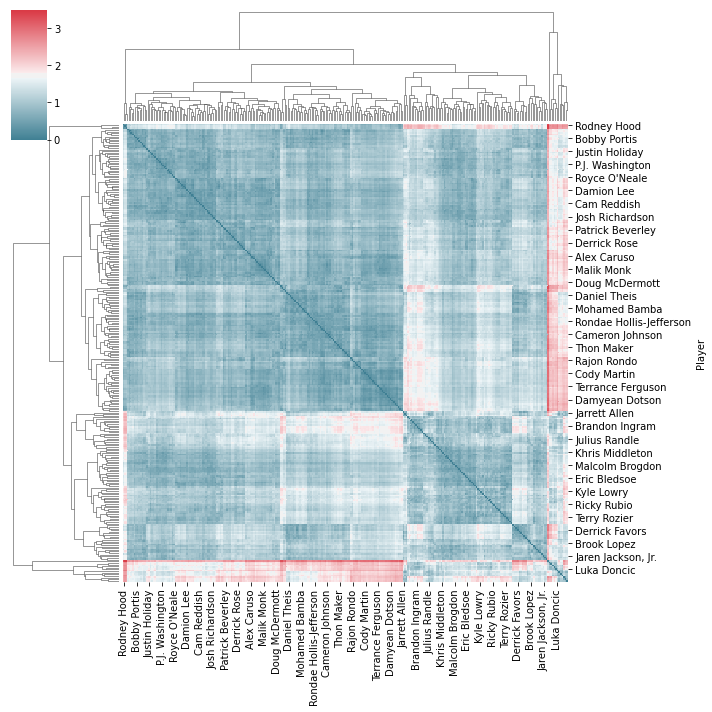

In [94]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(20,20))
sns.clustermap(dis_df,cmap=cmap) #BLUE IS BETTER

In [95]:
# ISKANJE PODOBNIH IGRALCEV

def closest_of(player):
    x = dis_df.loc[dis_df[player] < 0.1 ]
    idx = np.argpartition(x.values, 6)
    for i, player in enumerate(x.columns):
        if i in idx[0,:6] and x.values[0,i]:
            print("{}, {:.2f}".format(player, x.values[0,i]))

In [96]:
closest_of("LeBron James")

Luka Doncic, 0.89
Bradley Beal, 1.02
Russell Westbrook, 0.93
Kawhi Leonard, 0.94
Nikola Jokic, 0.96


In [97]:
closest_of("Luka Doncic")

Devin Booker, 0.70
Trae Young, 0.78
Bradley Beal, 0.82
Donovan Mitchell, 0.84
Brandon Ingram, 0.80


In [98]:
closest_of("Goran Dragic")

Lou Williams, 0.44
Kemba Walker, 0.43
J.J. Redick, 0.50
Eric Bledsoe, 0.41
Mike Conley, 0.51


In [99]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist 


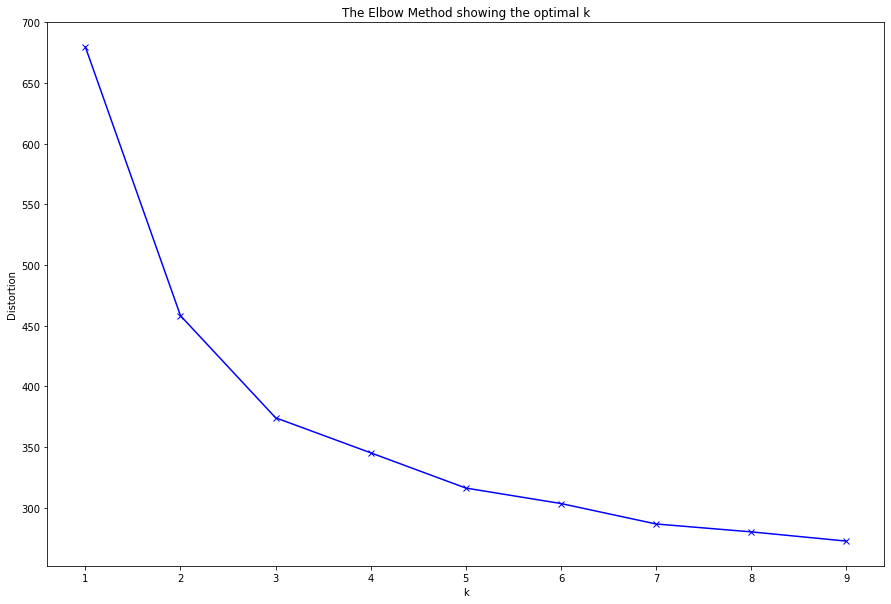

In [100]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(ml_df_2020)
    kmeanModel.fit(ml_df_2020)
    distortions.append(sum(np.min(cdist(ml_df_2020, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dis_df.shape[0])

# Plot the elbow
plt.figure(figsize=(15,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [101]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(ml_df_2020)
kmeans_ = kmeans.labels_


In [102]:
ml_df_2020["#K_cluster"] = kmeans_

In [103]:
ml_df_2020

,Games_Played,Minutes_Played,Field_Goals_Made,Field_Goals_Attempts,Three_Points_Made,Three_Points_Attempts,Free_Throws_Made,Free_Throws_Attempts,Turnovers,Personal_Fouls,...,Defensive_Rebounds,Rebounds,Assists,Steals,Blocks,Points,height_cm,weight_kg,#Age,#K_cluster
Player,,,,,,,,,,,,,,,,,,,,,
James Harden,68,2482.6,672,1514,299,843,692,800,308,227,...,376,446,512,125,60,2335,196.0,100.0,30.0,4
Damian Lillard,66,2473.7,624,1349,270,674,460,518,194,114,...,251,284,530,70,22,1978,191.0,88.0,29.0,4
Devin Booker,70,2511.8,627,1283,141,398,468,509,264,213,...,268,297,456,49,18,1863,198.0,93.0,23.0,4
Giannis Antetokounmpo,63,1916.9,685,1238,89,293,398,629,230,195,...,716,856,354,61,66,1857,211.0,110.0,25.0,4
Trae Young,60,2120.1,546,1249,205,568,481,559,289,104,...,223,255,560,65,8,1778,188.0,82.0,21.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Matt Dellavedova,57,820.7,62,175,21,91,32,37,59,78,...,57,75,180,20,2,177,193.0,91.0,29.0,3
Goga Bitadze,54,471.3,70,150,8,42,24,33,28,65,...,81,106,23,10,37,172,211.0,111.0,20.0,3
Nassir Little,48,572.5,65,151,14,59,28,44,15,72,...,77,108,22,13,14,172,198.0,100.0,19.0,3


In [104]:
ml_df_2020[ml_df_2020["#K_cluster"]==4]

,Games_Played,Minutes_Played,Field_Goals_Made,Field_Goals_Attempts,Three_Points_Made,Three_Points_Attempts,Free_Throws_Made,Free_Throws_Attempts,Turnovers,Personal_Fouls,...,Defensive_Rebounds,Rebounds,Assists,Steals,Blocks,Points,height_cm,weight_kg,#Age,#K_cluster
Player,,,,,,,,,,,,,,,,,,,,,
James Harden,68,2482.6,672,1514,299,843,692,800,308,227,...,376,446,512,125,60,2335,196.0,100.0,30.0,4
Damian Lillard,66,2473.7,624,1349,270,674,460,518,194,114,...,251,284,530,70,22,1978,191.0,88.0,29.0,4
Devin Booker,70,2511.8,627,1283,141,398,468,509,264,213,...,268,297,456,49,18,1863,198.0,93.0,23.0,4
Giannis Antetokounmpo,63,1916.9,685,1238,89,293,398,629,230,195,...,716,856,354,61,66,1857,211.0,110.0,25.0,4
Trae Young,60,2120.1,546,1249,205,568,481,559,289,104,...,223,255,560,65,8,1778,188.0,82.0,21.0,4
Luka Doncic,61,2047.3,581,1255,171,541,426,562,260,153,...,495,573,538,60,14,1759,201.0,99.0,20.0,4
Bradley Beal,57,2053.2,593,1303,170,481,385,457,194,126,...,190,242,347,71,23,1741,191.0,94.0,26.0,4
LeBron James,67,2316.3,643,1303,148,425,264,381,261,118,...,459,525,684,78,36,1698,203.0,113.0,35.0,4
Donovan Mitchell,69,2364.0,602,1342,173,473,278,322,184,172,...,251,304,294,70,14,1655,191.0,98.0,23.0,4


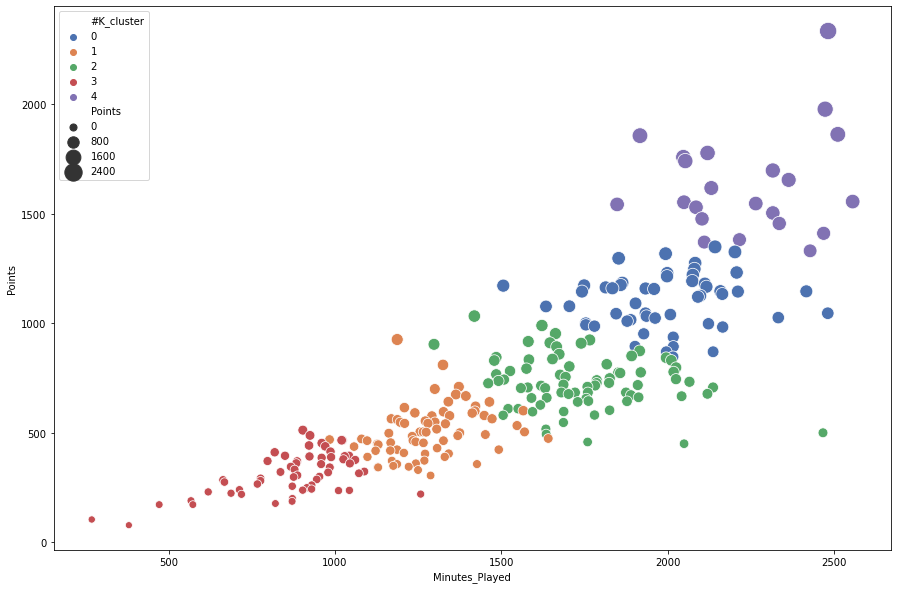

In [105]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=ml_df_2020, x="Minutes_Played", y="Points", 
                hue="#K_cluster", palette="deep",size = "Points",sizes=(50, 300))
plt.show()

In [106]:
ml_df_2020.sort_values(by="Points",ascending = False)[["Points","Minutes_Played","#K_cluster","#Age"]][0:10]

,Points,Minutes_Played,#K_cluster,#Age
Player,,,,
James Harden,2335,2482.6,4,30.0
Damian Lillard,1978,2473.7,4,29.0
Devin Booker,1863,2511.8,4,23.0
Giannis Antetokounmpo,1857,1916.9,4,25.0
Trae Young,1778,2120.1,4,21.0
Luka Doncic,1759,2047.3,4,20.0
Bradley Beal,1741,2053.2,4,26.0
LeBron James,1698,2316.3,4,35.0
Donovan Mitchell,1655,2364.0,4,23.0
